<a href="https://colab.research.google.com/github/paulodeazevedo/machine-learning-sklearn/blob/master/Introducao_a_algoritmos_nao_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

In [3]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
from sklearn.cluster import KMeans

In [7]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 2 1 2]


In [8]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.60378069  0.05824928 -0.23032654 -0.26724219 -0.58276645
   0.56328494 -0.21554224 -0.12445017 -0.11889175  0.23603701  0.51633936
   0.12770438 -0.17952976  0.53027762 -0.33119489  0.5232546   1.40310862
  -0.11452059 -0.06352929]
 [-0.05917995  0.13466656  1.11472497  1.93303294  2.11250048  0.15756617
  -0.32477665 -0.19996291 -0.60014413  1.21145499 -0.09492563 -0.2674432
   0.31102141  0.31164845 -0.13783356 -0.27300025  0.1405016  -0.47056597
  -0.16920423 -0.09000487]
 [ 0.03426107 -0.26598836 -0.22190165 -0.25199444 -0.26916501  0.20551316
  -0.16792125  0.12200895  0.15677855 -0.16813124 -0.07769793 -0.15931721
  -0.10658435  0.01644659 -0.18798987  0.18137313 -0.23475201 -0.47856331
  

In [9]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.603781,0.058249,-0.230327,-0.267242,-0.582766,0.563285,-0.215542,-0.124450,-0.118892,0.236037,0.516339,0.127704,-0.179530,0.530278,-0.331195,0.523255,1.403109,-0.114521,-0.063529
1,-0.059180,0.134667,1.114725,1.933033,2.112500,0.157566,-0.324777,-0.199963,-0.600144,1.211455,-0.094926,-0.267443,0.311021,0.311648,-0.137834,-0.273000,0.140502,-0.470566,-0.169204,-0.090005
2,0.034261,-0.265988,-0.221902,-0.251994,-0.269165,0.205513,-0.167921,0.122009,0.156779,-0.168131,-0.077698,-0.159317,-0.106584,0.016447,-0.187990,0.181373,-0.234752,-0.478563,0.076040,0.041495


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac15a1eda0>,
      dtype=object)

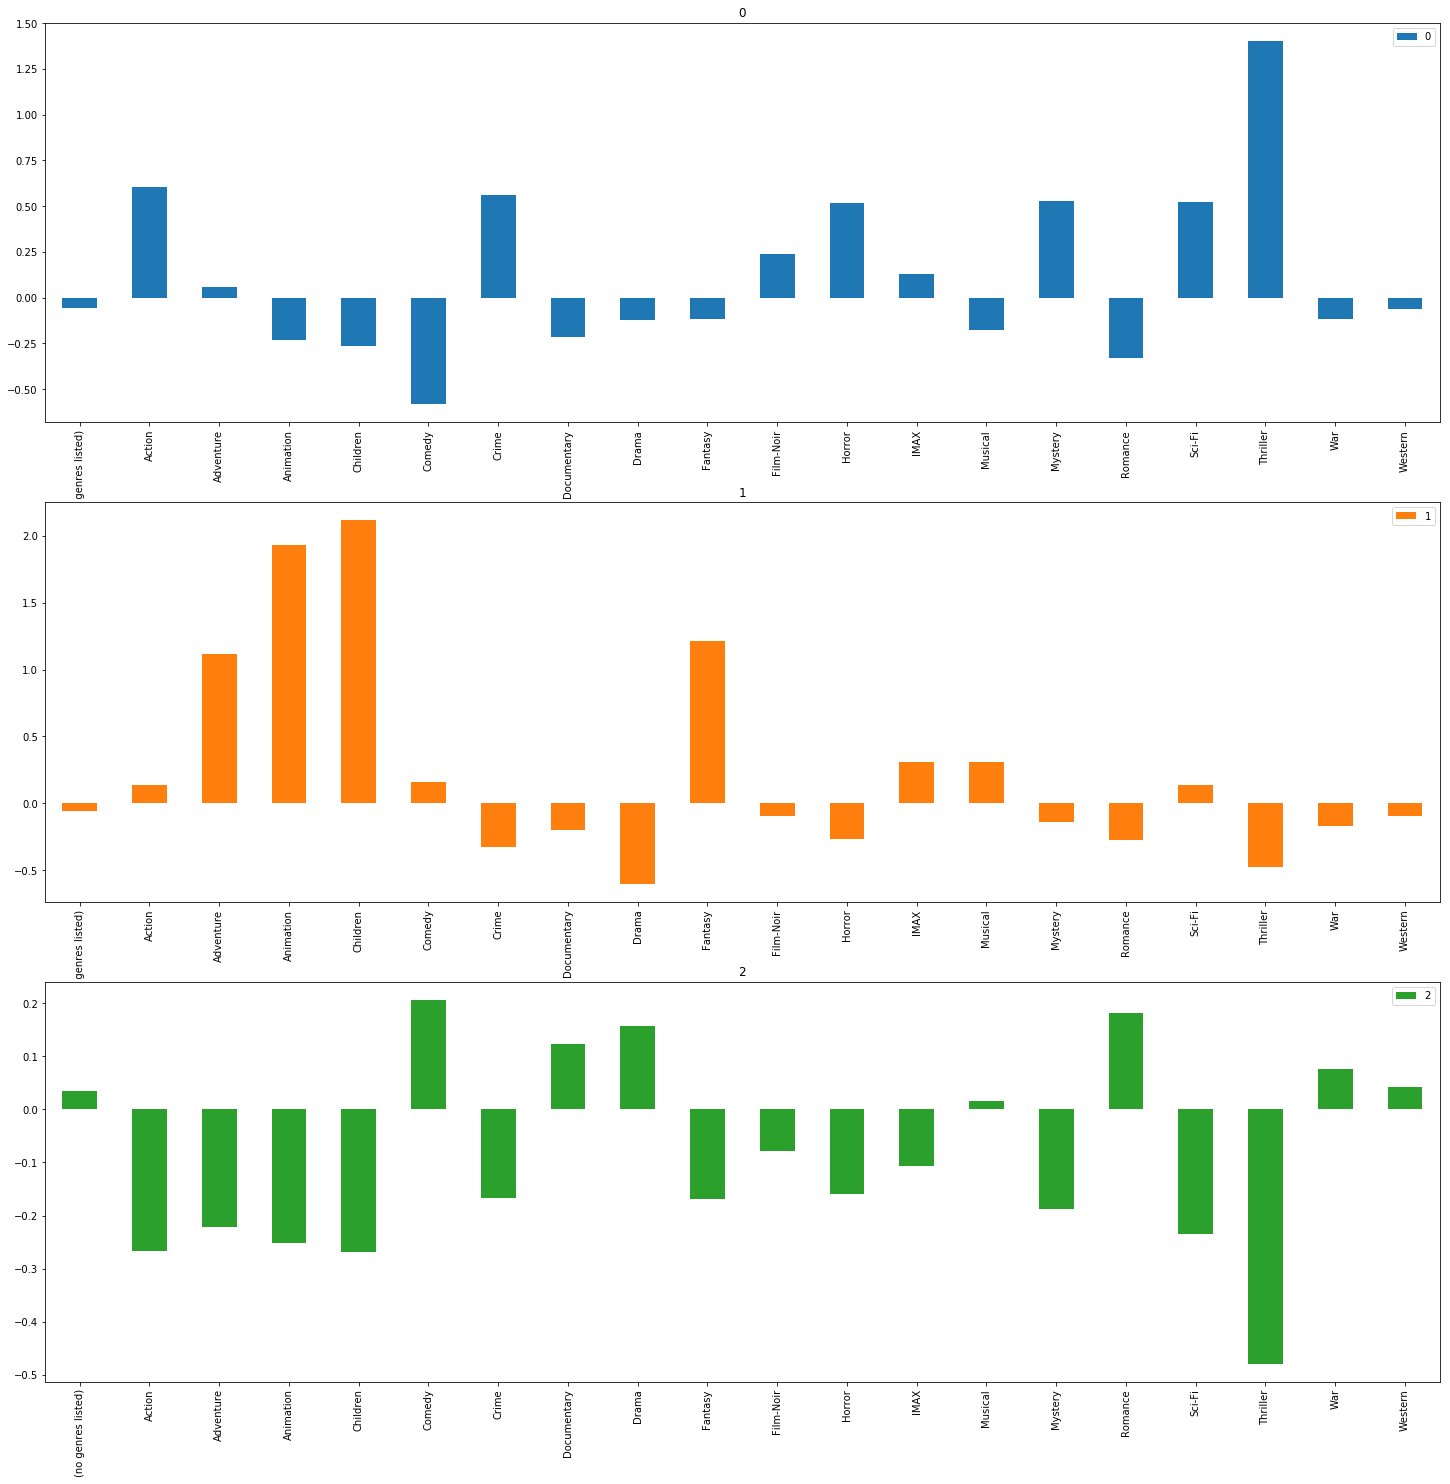

In [10]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [11]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4155,5980,Black Christmas (1974),Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
7820,92681,Journey 2: The Mysterious Island (2012),Action|Adventure|Comedy|Sci-Fi|IMAX,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7128,71205,Jennifer's Body (2009),Comedy|Horror|Sci-Fi|Thriller,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1640,2186,Strangers on a Train (1951),Crime|Drama|Film-Noir|Thriller,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4315,6303,"Andromeda Strain, The (1971)",Mystery|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8419,110826,Brick Mansions (2014),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
221,257,Just Cause (1995),Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7771,91571,Coriolanus (2011),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2883,3857,Bless the Child (2000),Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9503,170875,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [0]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-52.96518  ,  17.810051 ],
       [ 26.92163  , -31.509636 ],
       [ -7.871767 , -35.3006   ],
       ...,
       [ 10.5166445,  -9.2393055],
       [ 31.794731 ,  25.334732 ],
       [-26.658546 ,  16.322714 ]], dtype=float32)

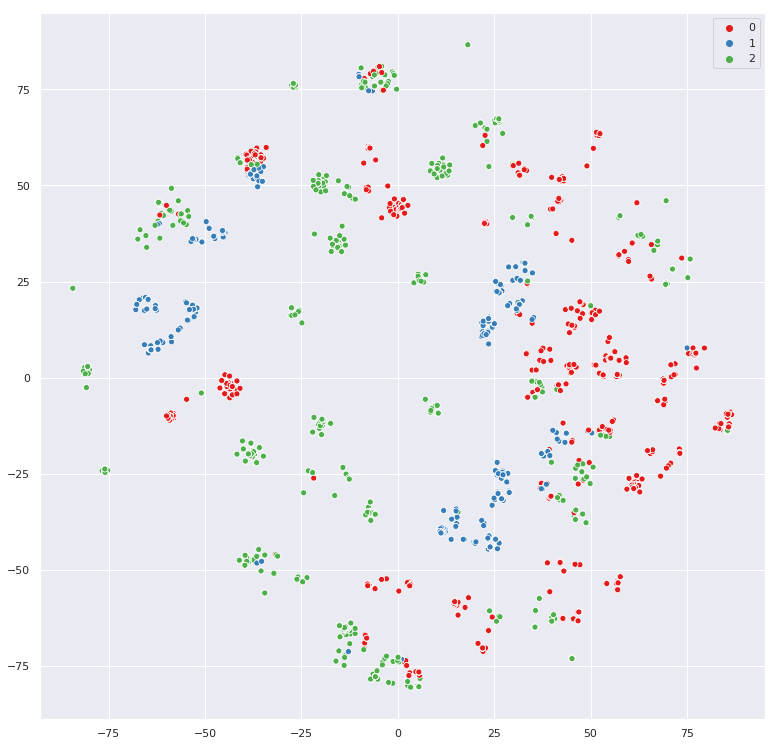

In [14]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac103bc198>,
      dtype=object)

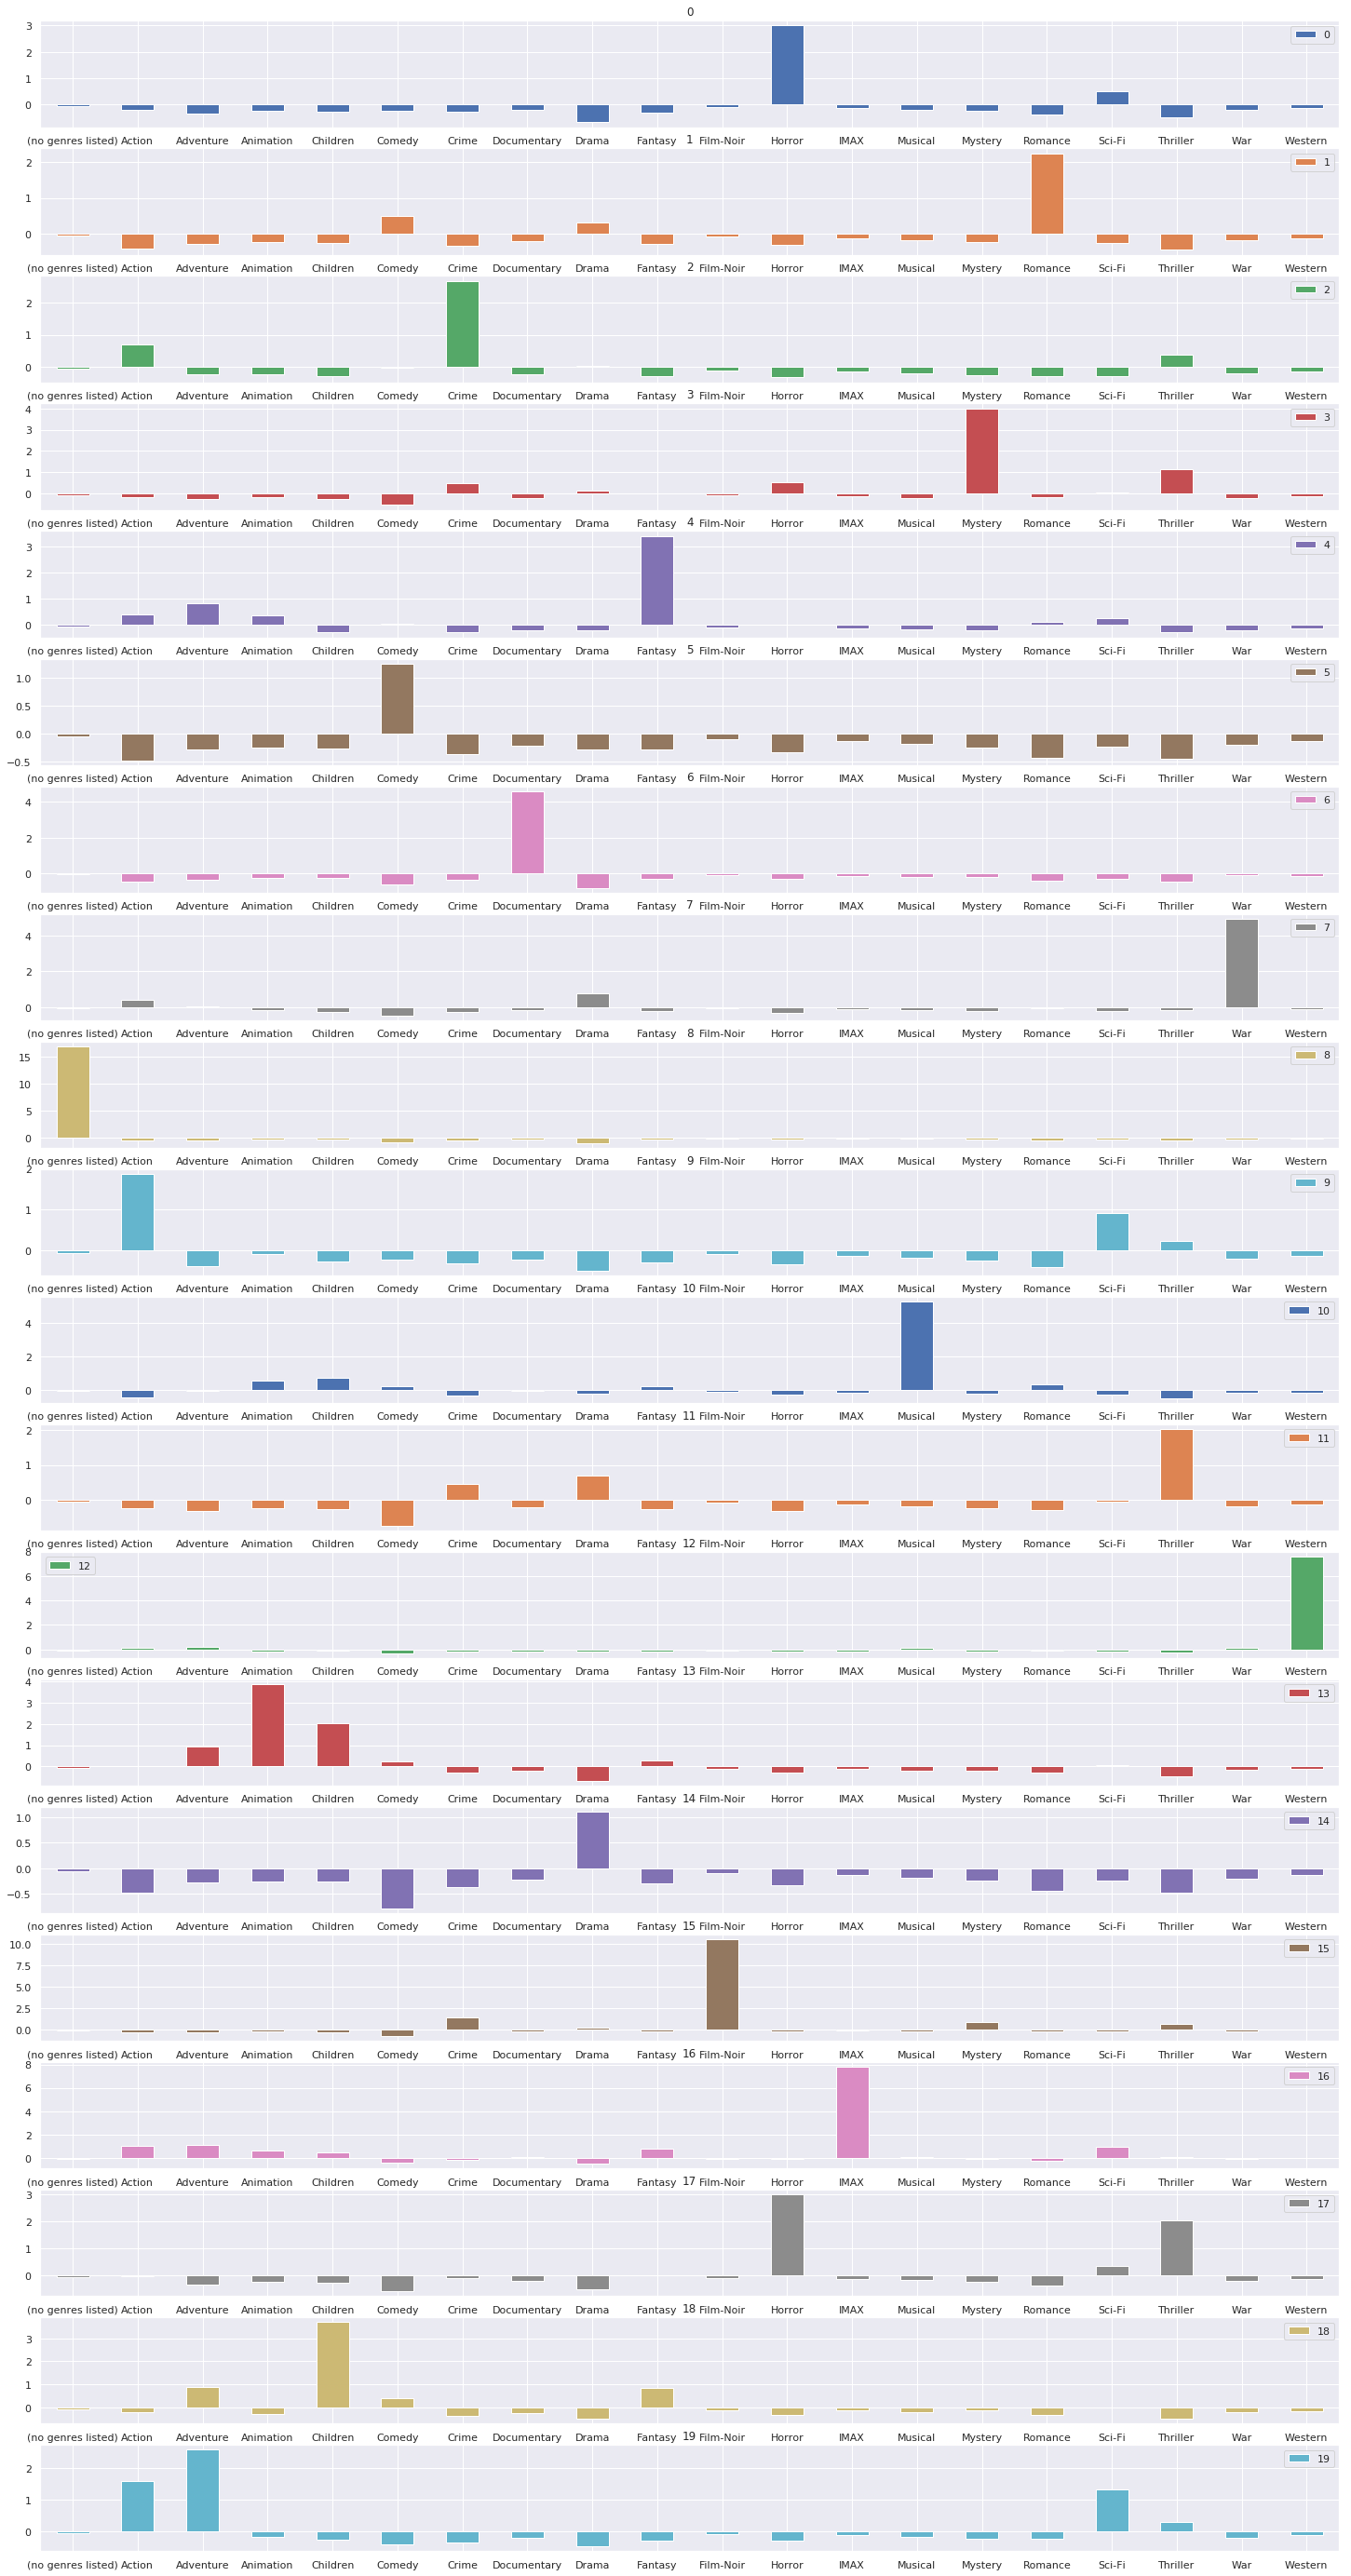

In [15]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [16]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7044,69131,Killshot (2008),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2817,3765,"Hot Spot, The (1990)",Crime|Drama|Romance,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4855,7258,"Perfect Score, The (2004)",Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3548,4855,Dirty Harry (1971),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4575,6796,Boyz N the Hood (1991),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6142,43921,Running Scared (2006),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
893,1190,Tie Me Up! Tie Me Down! (¡Átame!) (1990),Crime|Drama|Romance,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
7638,87869,Horrible Bosses (2011),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4911,7364,Intermission (2003),Comedy|Crime|Drama,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3511,4799,"It's a Mad, Mad, Mad, Mad World (1963)",Action|Adventure|Comedy|Crime,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [18]:
kmeans(20, generos_escalados)

[20, 55690.855588249244]

In [19]:
kmeans(3, generos_escalados)

[3, 169143.50169476122]

In [20]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179484.00213862408],
 [3, 166103.89188928014],
 [4, 157086.97518109073],
 [5, 147540.92085392508],
 [6, 138245.2884466782],
 [7, 129046.88494344457],
 [8, 120084.34563623228],
 [9, 111836.77153238261],
 [10, 102658.28204433969],
 [11, 95148.7174179807],
 [12, 87136.16360723024],
 [13, 80403.92628564243],
 [14, 74088.91381723518],
 [15, 70225.66381827966],
 [16, 66761.23488458522],
 [17, 61775.25452305053],
 [18, 58890.962773100226],
 [19, 57430.40014648131],
 [20, 55638.22444608734],
 [21, 53647.00498393808],
 [22, 51766.26823948905],
 [23, 50375.609623155375],
 [24, 49370.09829934749],
 [25, 47497.671011539736],
 [26, 47327.69672719344],
 [27, 45219.9225947458],
 [28, 44478.64501608493],
 [29, 43859.31805204246],
 [30, 42577.96165038554],
 [31, 41583.531347953096],
 [32, 41484.2720481417],
 [33, 40067.065731983865],
 [34, 39178.77868142742],
 [35, 38573.2958791661],
 [36, 38413.57229958021],
 [37, 37072.19016302475],
 [38, 36327.65659136467],
 [39, 36350.040278880

In [21]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179484.002139
2,3,166103.891889
3,4,157086.975181
4,5,147540.920854
5,6,138245.288447
6,7,129046.884943
7,8,120084.345636
8,9,111836.771532
9,10,102658.282044


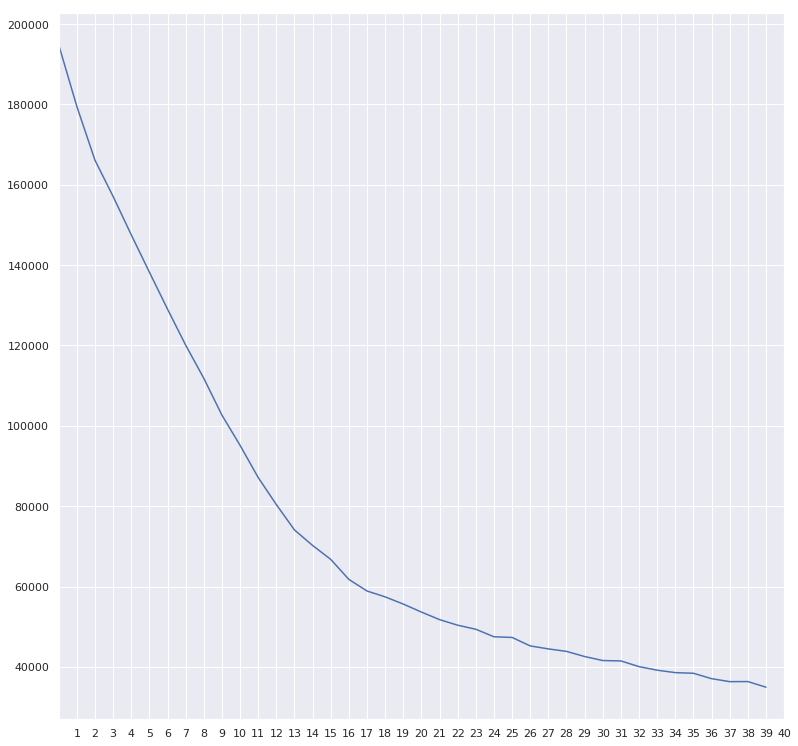

In [22]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0f721a20>,
      dtype=object)

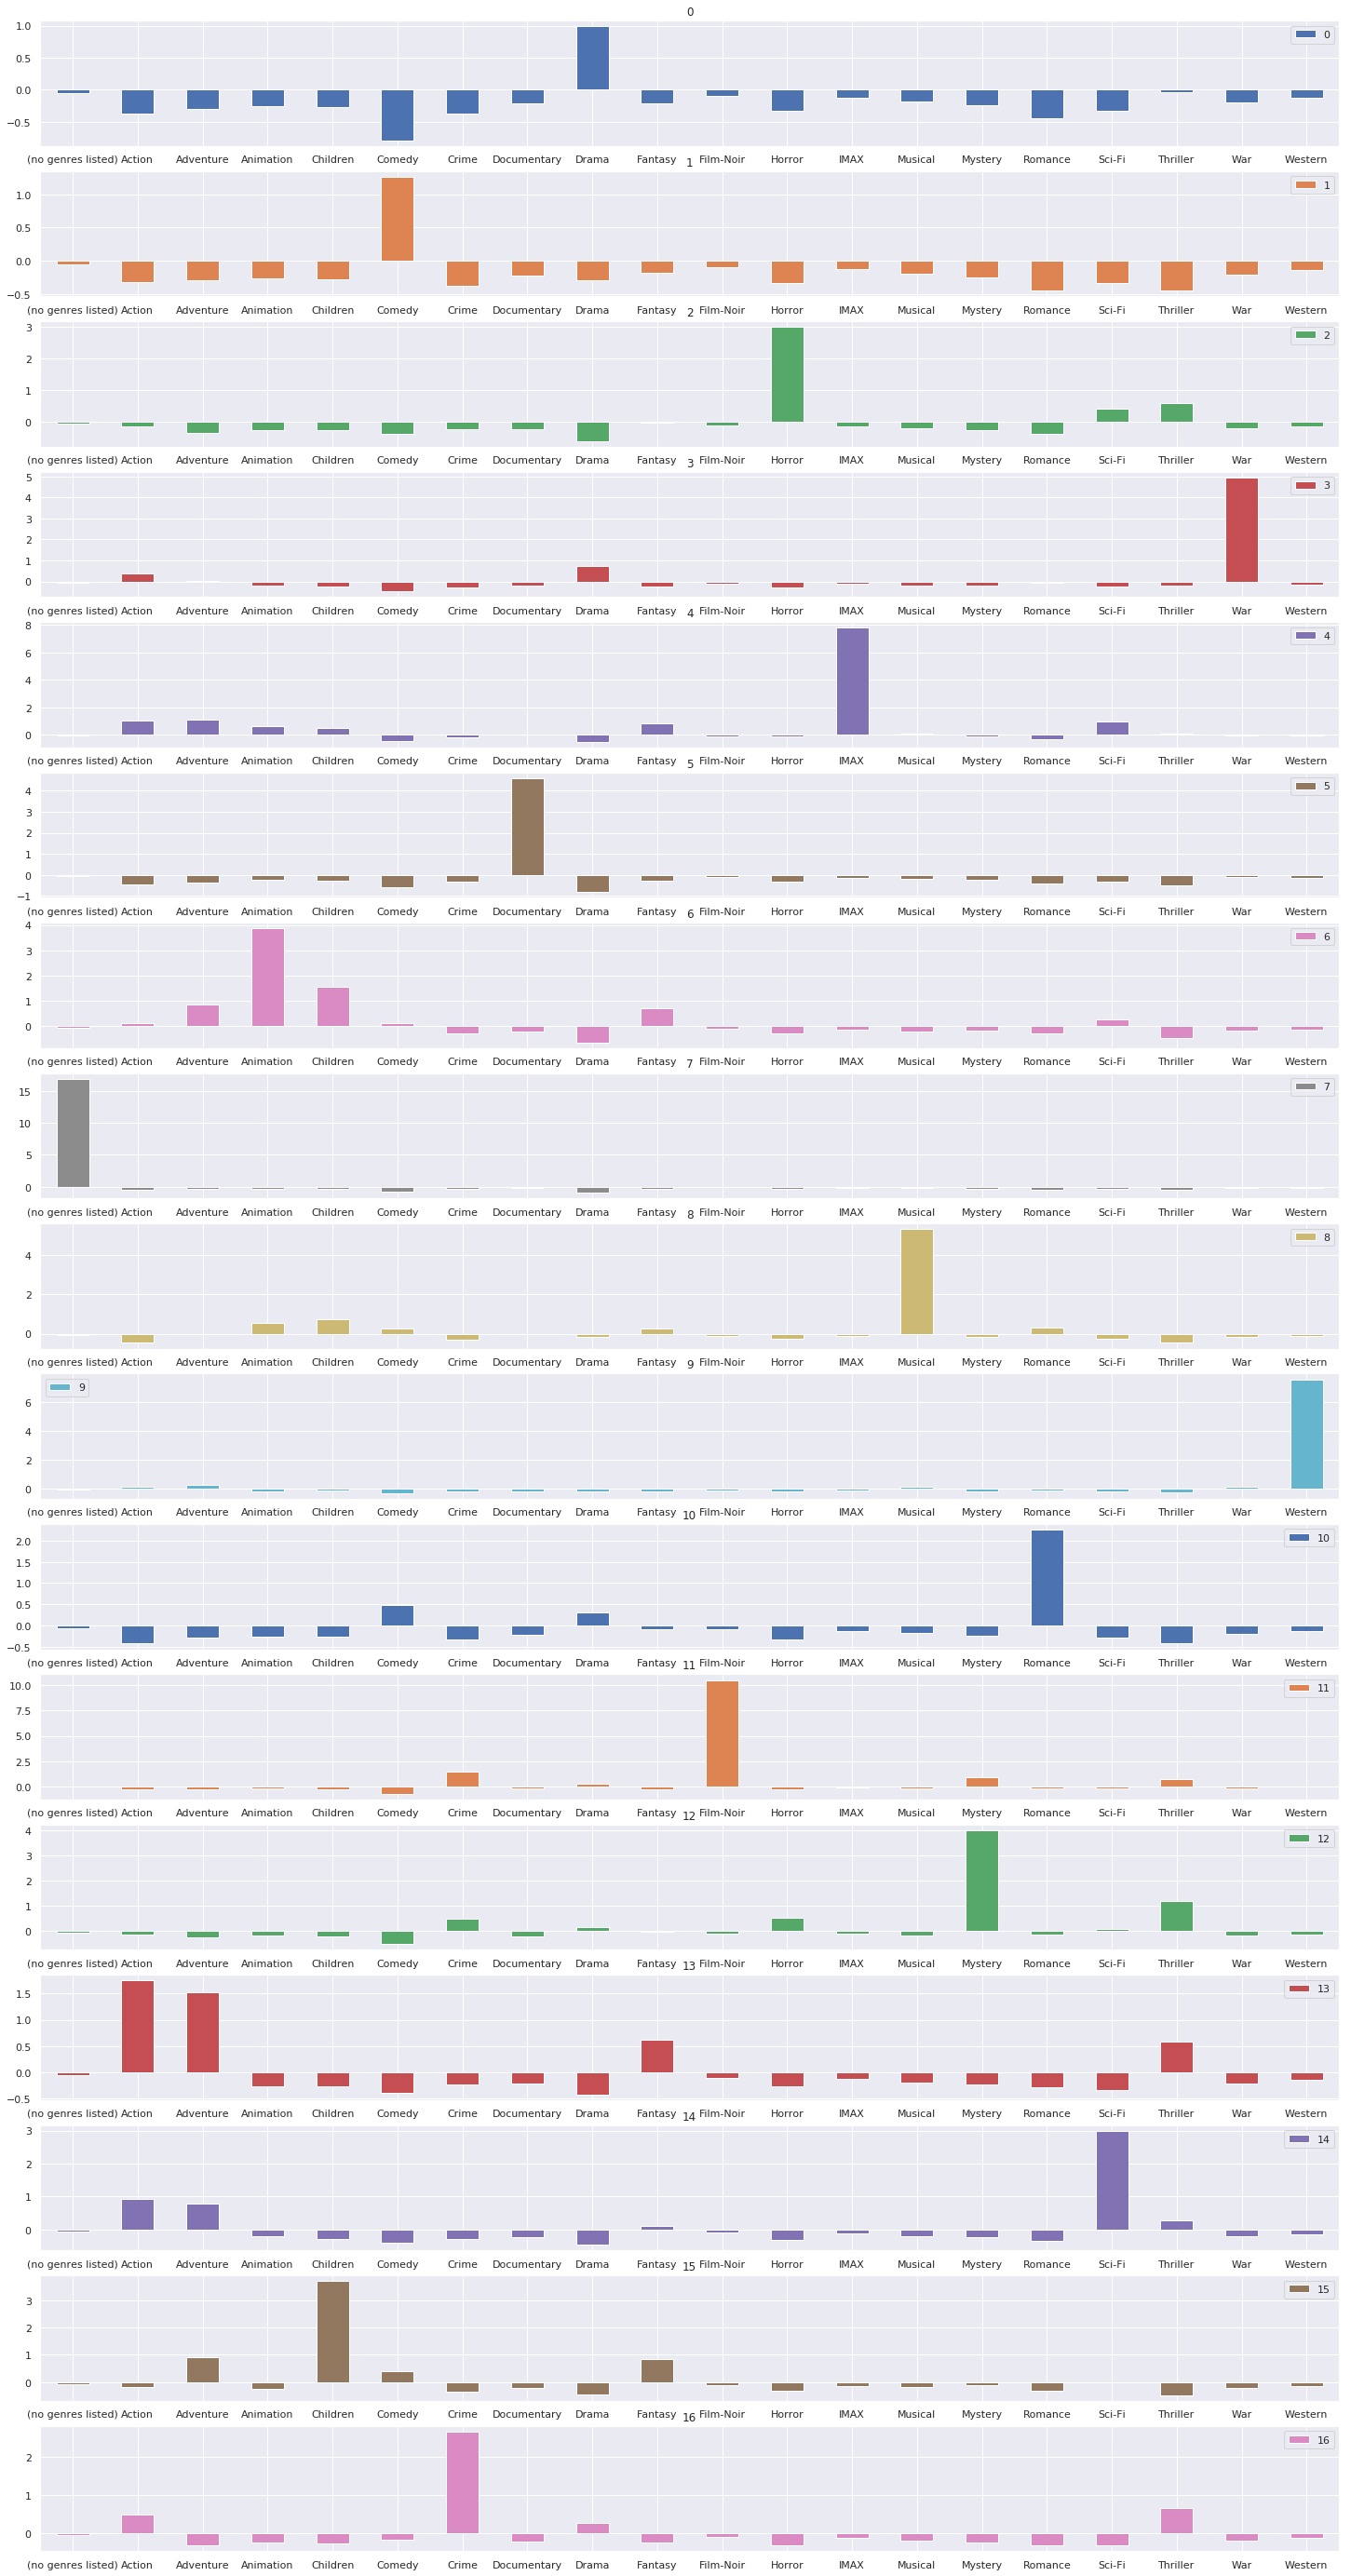

In [23]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [24]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4686,6997,Hoffa (1992),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1572,2110,Dead Men Don't Wear Plaid (1982),Comedy|Crime|Thriller,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2788,3729,Shaft (1971),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5611,27022,Thursday (1998),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
804,1053,Normal Life (1996),Crime|Drama|Romance,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
7006,67923,"Fast & Furious (Fast and the Furious 4, The) (...",Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5120,8158,Rush (1991),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8864,133716,Bootleggers (1961),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2206,2931,Time of the Gypsies (Dom za vesanje) (1989),Comedy|Crime|Drama|Fantasy,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1251,1662,Gang Related (1997),Crime,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [27]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  2.0591533,  39.412373 ],
       [-15.810694 , -54.917587 ],
       [-43.240112 ,  12.2147   ],
       ...,
       [ 18.685966 ,  -5.2360454],
       [ 10.468745 ,  24.419128 ],
       [-18.559341 ,  -8.378314 ]], dtype=float32)

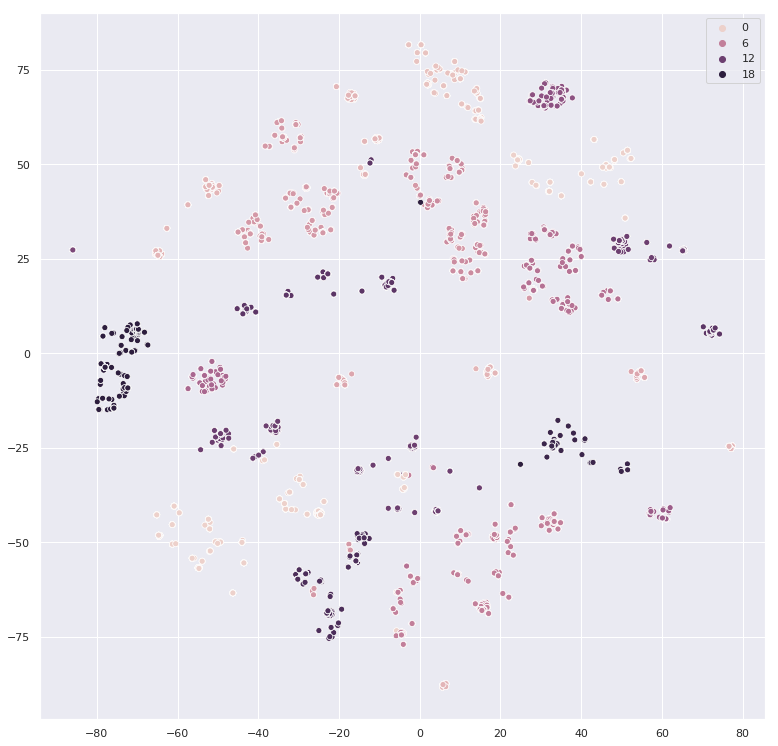

In [28]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0f721a58>,
      dtype=object)

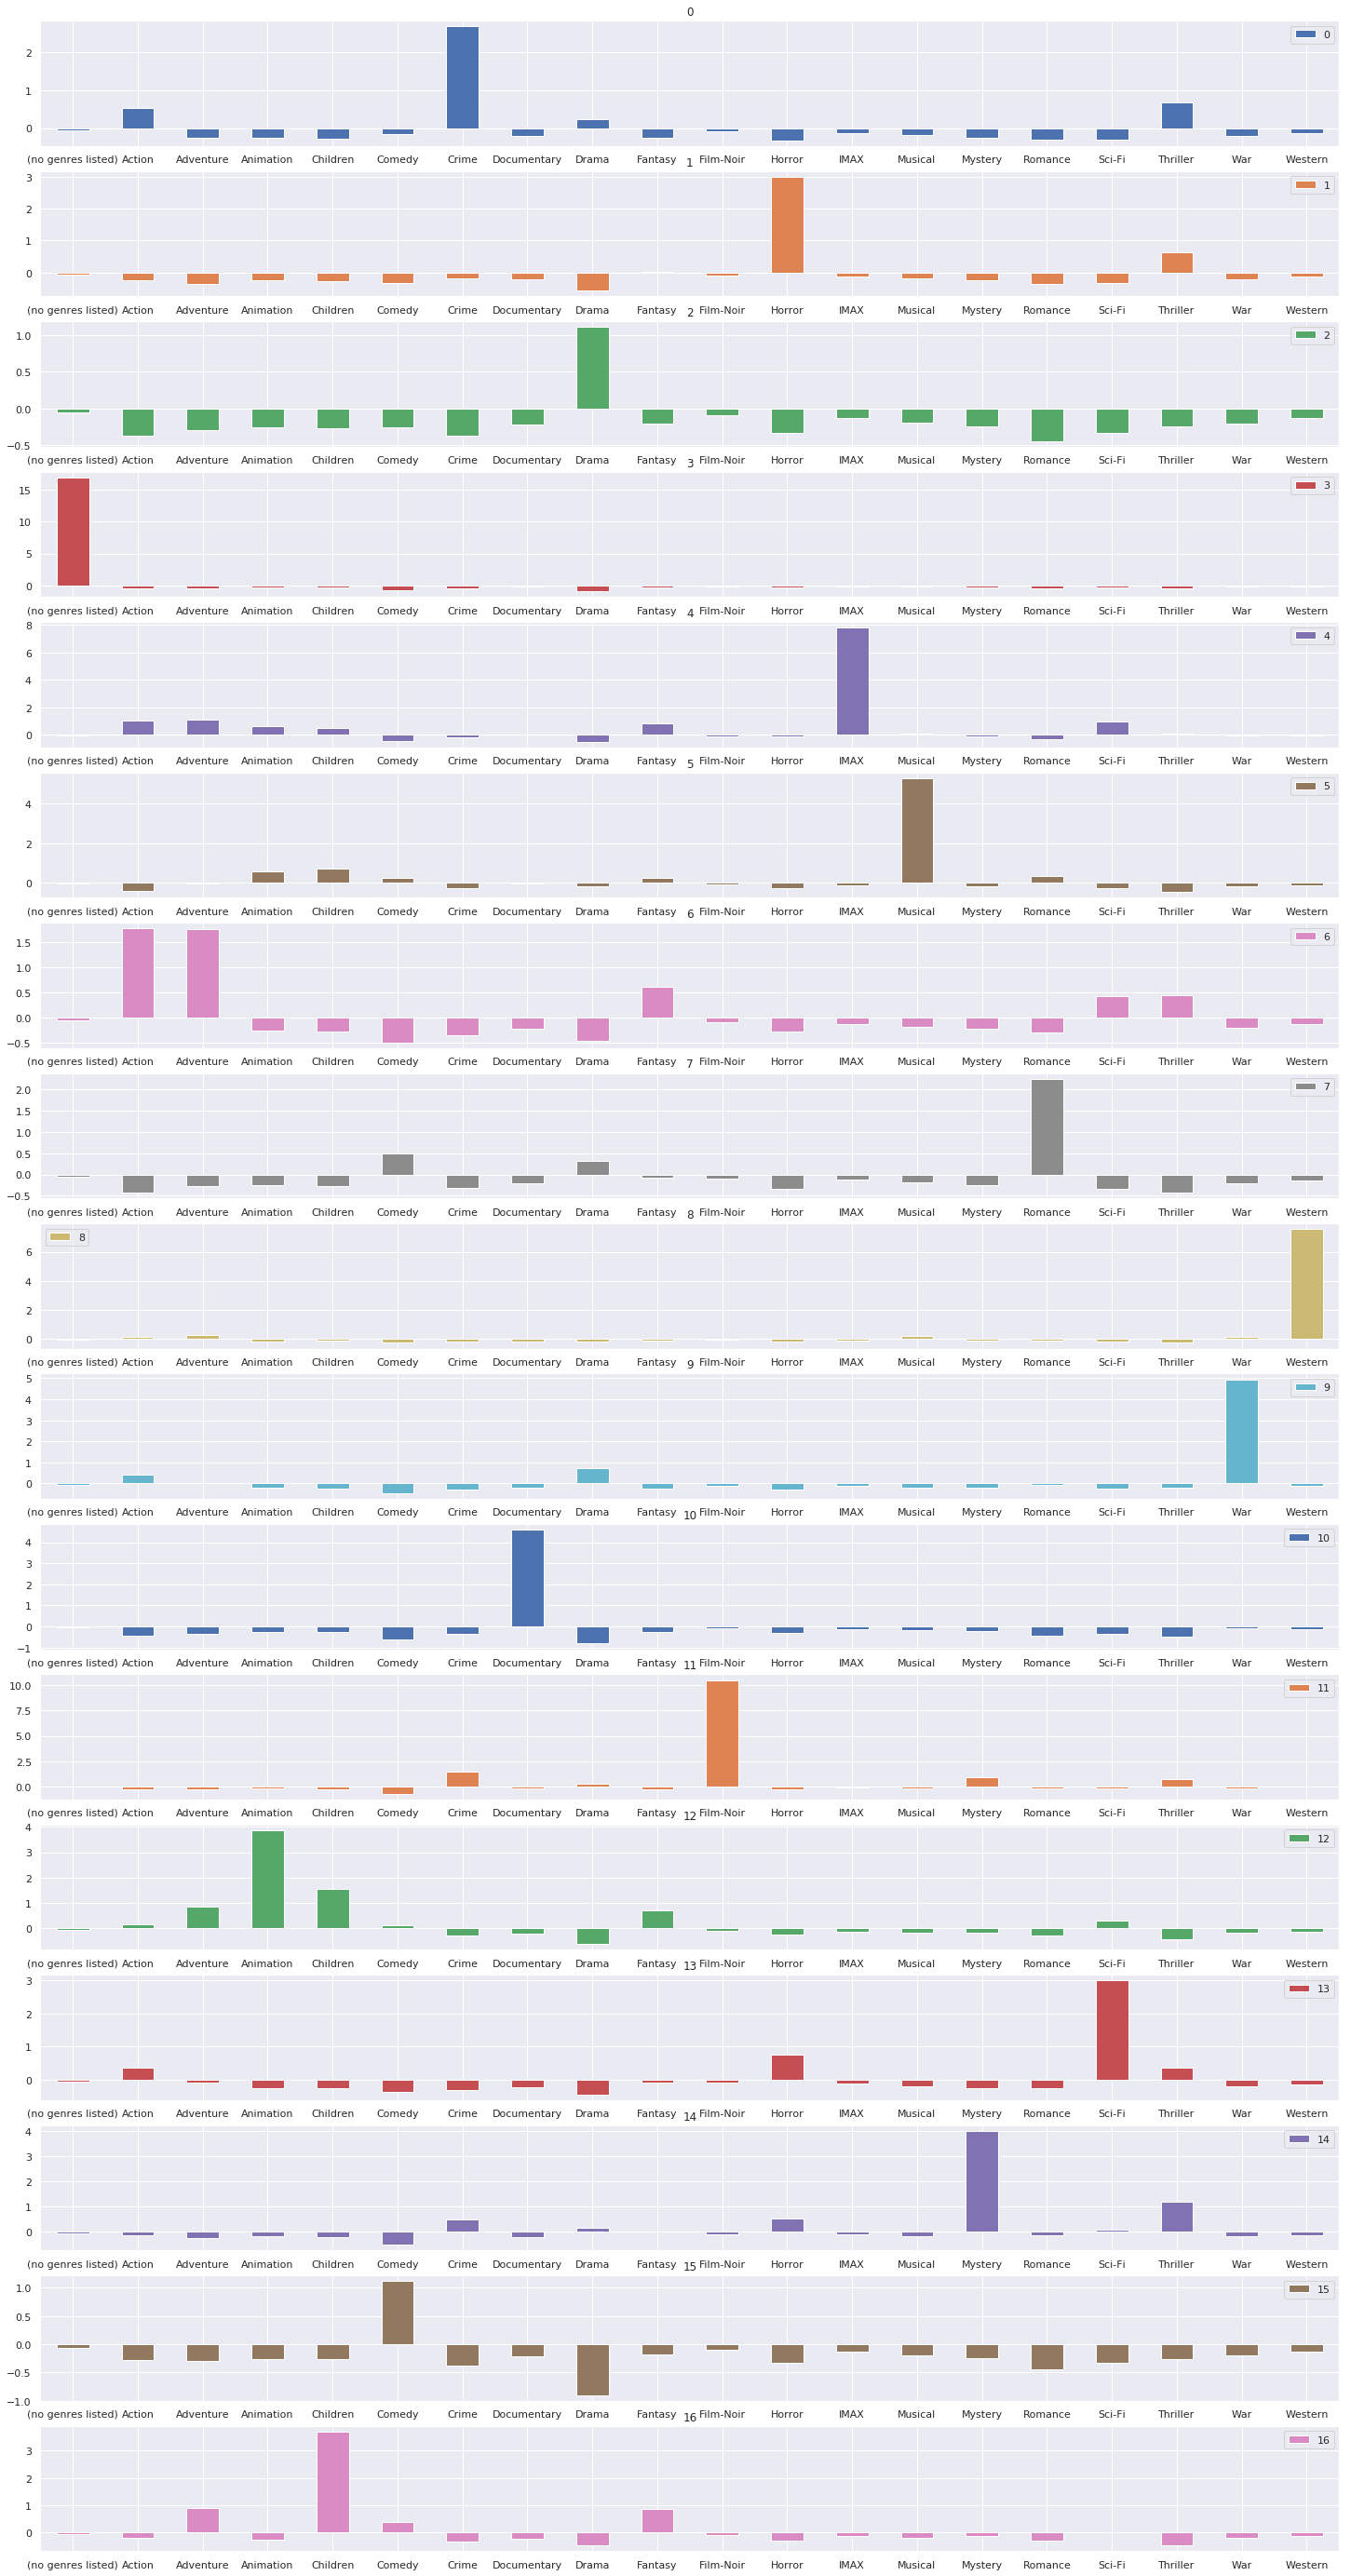

In [30]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [31]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 2.        , 15.        ,  2.43326335,  2.        ],
       [ 7.        , 17.        ,  2.92277736,  3.        ],
       [ 0.        , 18.        ,  3.41902657,  4.        ],
       [ 6.        , 19.        ,  3.59901303,  5.        ],
       [13.        , 20.        ,  3.68867521,  6.        ],
       [ 1.        , 21.        ,  3.76569931,  7.        ],
       [16.        , 22.        ,  4.38208958,  8.        ],
       [12.        , 23.        ,  4.69489282,  9.        ],
       [14.        , 24.        ,  4.78468358, 10.        ],
       [10.        , 25.        ,  5.12336213, 11.        ],
       [ 9.        , 26.        ,  5.25521282, 12.        ],
       [ 5.        , 27.        ,  5.841111  , 13.        ],
       [ 8.        , 28.        ,  7.87602188, 14.        ],
       [ 4.        , 29.        ,  8.10777788, 15.        ],
       [11.        , 30.        , 10.81653889, 16.        ],
       [ 3.        , 31.        , 17.06710799, 17.        ]])

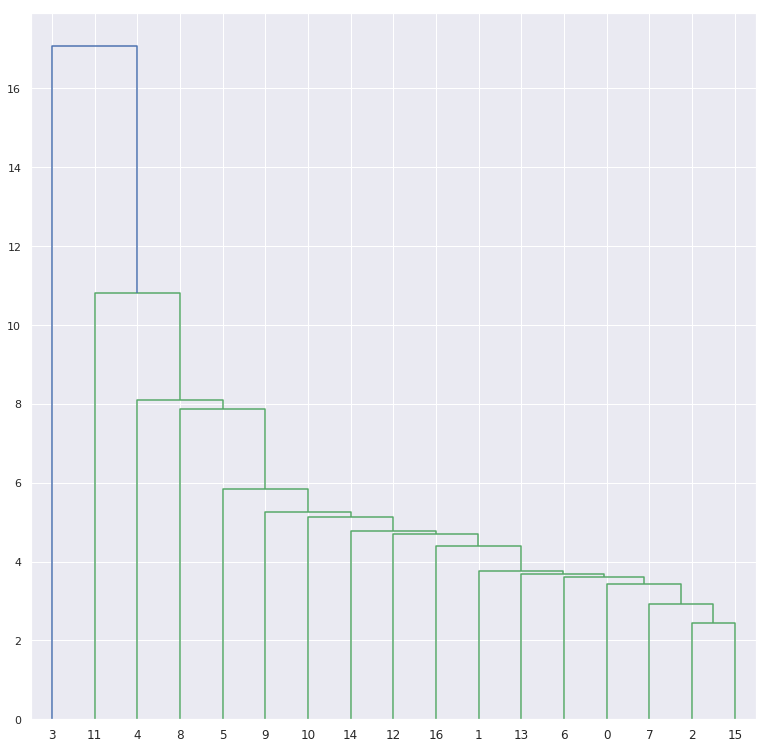

In [33]:
dendrograma = dendrogram(matriz_de_distancia)

In [55]:
grupo = 8

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro]

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
136,163,Desperado (1995),Action|Romance|Western,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
178,210,Wild Bill (1995),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
229,266,Legends of the Fall (1994),Drama|Romance|War|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
263,303,"Quick and the Dead, The (1995)",Action|Thriller|Western,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
326,368,Maverick (1994),Adventure|Comedy|Western,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
340,383,Wyatt Earp (1994),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
360,416,Bad Girls (1994),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
399,458,Geronimo: An American Legend (1993),Drama|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
424,487,Lightning Jack (1994),Comedy|Western,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
